Problem

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

C:\Users\KESHAB CHANDRA DAS\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Load data and Data Processing

In [2]:
#loading the data to pandas dataframe
df=pd.read_csv("loan.csv")

In [3]:
#printing first 5 rows of the dataset
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#number of rows and columns
df.shape

(614, 13)

In [5]:
#statistical measures of the numerical columns
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


# Data Cleaning

In [6]:
#checking the number of null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
#very few numbers of obseravation are missing with respect to total numbers of rows
#dropping null values
df=df.dropna()

<AxesSubplot:>

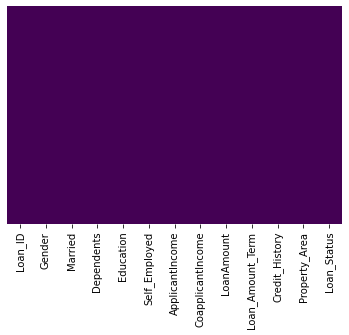

In [8]:
#checking the number of null values again
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
df.shape

(480, 13)

# Handling Numerical columns

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


In [11]:
num_cols = df.select_dtypes(["int64","float"]).columns
num_cols

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [12]:
# label encoding
#target variable
df.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [13]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [14]:
#extracting the categorical column
df=df.drop(['Loan_ID'], axis=1)
cat_cols = df.select_dtypes(["object"]).columns
cat_cols

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')

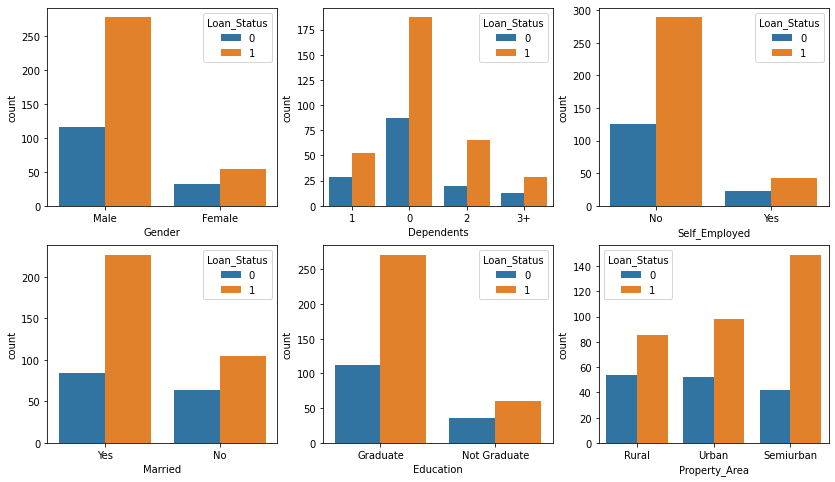

In [15]:
#checking value counts of each categorical data with loan status
fig,axes = plt.subplots(2,3,figsize=(14,8))
for idx,cols in enumerate(cat_cols):
    row,col = idx%2,idx//2
    sns.countplot(x=cols,data=df,hue='Loan_Status',ax=axes[row,col])

In [16]:
for column in cat_cols:
    print(column)
    print(df[column].value_counts())

Gender
Male      394
Female     86
Name: Gender, dtype: int64
Married
Yes    311
No     169
Name: Married, dtype: int64
Dependents
0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64
Education
Graduate        383
Not Graduate     97
Name: Education, dtype: int64
Self_Employed
No     414
Yes     66
Name: Self_Employed, dtype: int64
Property_Area
Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64


In [17]:
# replacing the value of 3+ to 4
df = df.replace(to_replace='3+', value=4)

In [18]:
df['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

In [19]:
# convert categorical columns to numerical values
df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
        'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [20]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


# Data vizualisation

distribution of "LoanAmountTerm" variable :

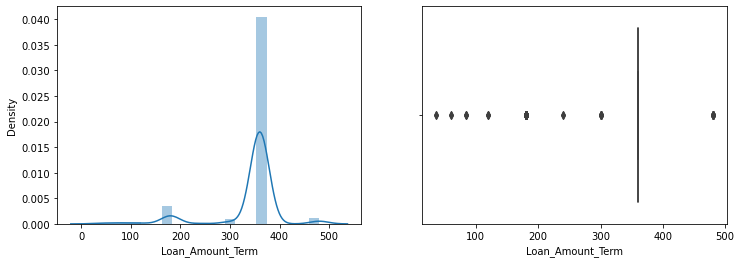

In [21]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(df["Loan_Amount_Term"])

plt.subplot(1,2,2)
sns.boxplot(df["Loan_Amount_Term"])
plt.show()

distribution of "LoanAmount" variable :

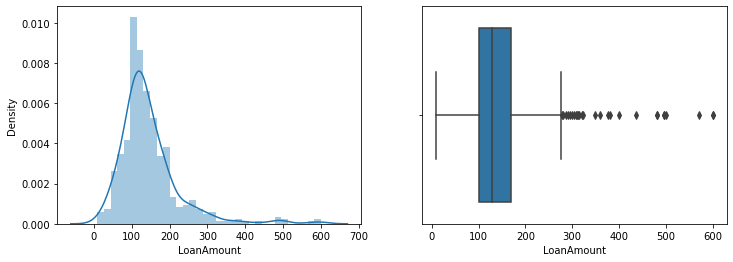

In [22]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(df['LoanAmount'])

plt.subplot(1,2,2)
sns.boxplot(df['LoanAmount'])
plt.show()

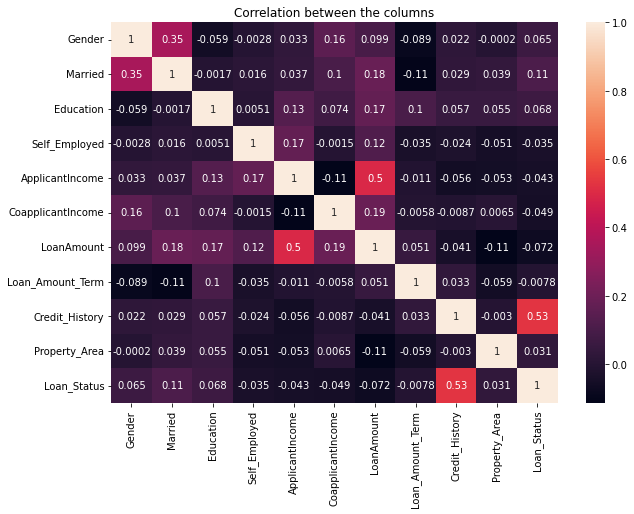

In [23]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation between the columns')
plt.show()

array([[<AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Married'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Self_Employed'}>,
        <AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>,
        <AxesSubplot:title={'center':'Credit_History'}>],
       [<AxesSubplot:title={'center':'Property_Area'}>,
        <AxesSubplot:title={'center':'Loan_Status'}>, <AxesSubplot:>]],
      dtype=object)

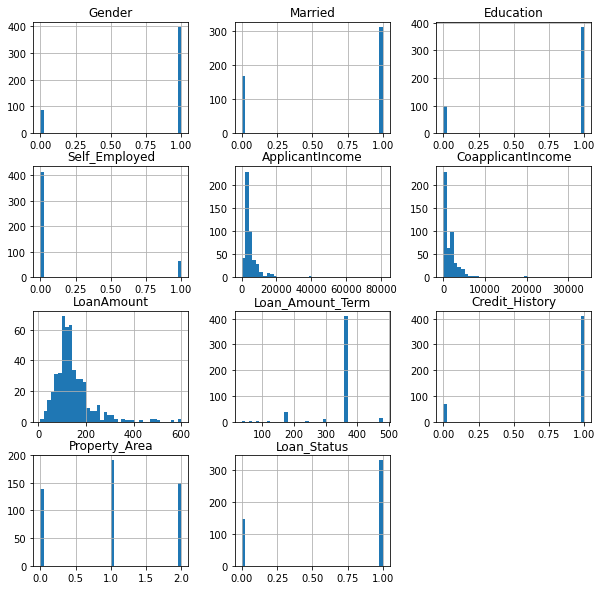

In [24]:
#Histogram of each feature
df.hist(bins=40,figsize=(10,10))

# separating the data and label

In [25]:
X = df.drop(columns=['Loan_Status'],axis=1)
Y = df['Loan_Status']

In [26]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2


In [27]:
Y.head()

1    0
2    1
3    1
4    1
5    1
Name: Loan_Status, dtype: int64

Train Test Split

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


# Build the Classification algorithm(SVM)

In [30]:
from sklearn import svm
from sklearn.metrics import accuracy_score

In [31]:
classifier = svm.SVC(kernel='linear')

In [32]:
#training the support vector machine classifier
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [33]:
sv_pred=classifier.predict(X_test)

In [34]:
#train test score of SVM
print("train accuracy of SVM: ",classifier.score(X_train,Y_train)*100)
print("test accuracy of SVM: ",classifier.score(X_test,Y_test)*100)
print("accuracy of the SVM model: ",accuracy_score(Y_test,sv_pred)*100)

train accuracy of SVM:  79.62962962962963
test accuracy of SVM:  81.25
accuracy of the SVM model:  81.25
